In [6]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [7]:
df=pd.read_csv('train.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [8]:
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


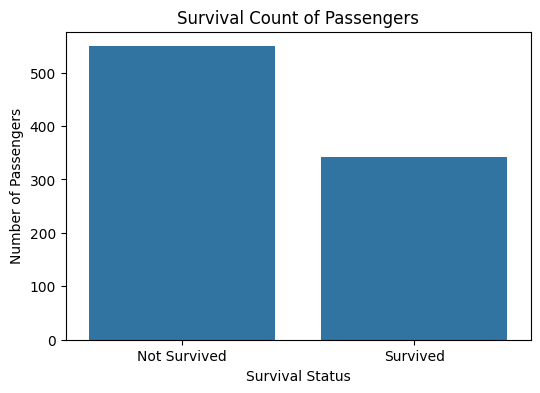

In [12]:
counts=df['Survived'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(ticks=[0, 1], labels=['Not Survived', 'Survived'])
plt.xlabel('Survival Status')
plt.ylabel('Number of Passengers')
plt.title('Survival Count of Passengers')
plt.show()

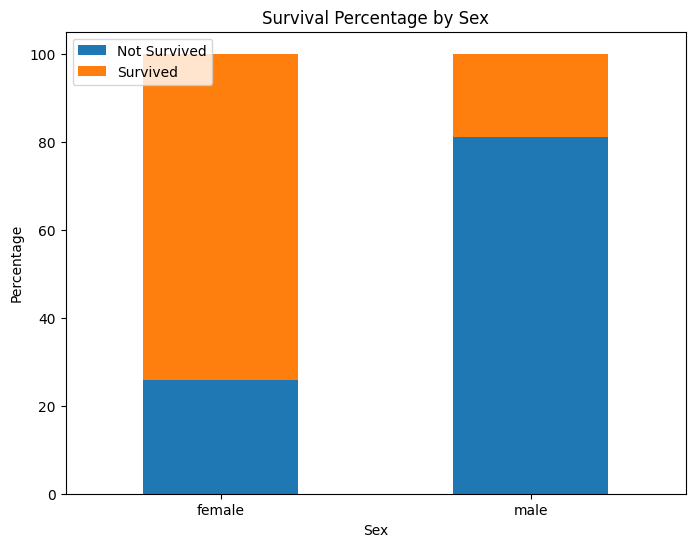

In [11]:
survived_sex = df.groupby('Sex')['Survived'].value_counts(normalize=True).unstack() * 100

survived_sex.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Survival Percentage by Sex')
plt.xlabel('Sex')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(['Not Survived', 'Survived'], loc='upper left')
plt.show()

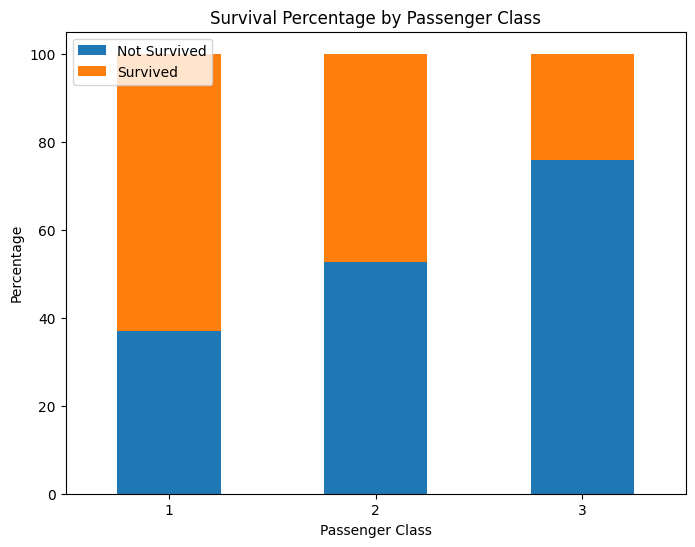

In [13]:
survived_pclass = df.groupby('Pclass')['Survived'].value_counts(normalize=True).unstack() * 100

survived_pclass.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Survival Percentage by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(['Not Survived', 'Survived'], loc='upper left')
plt.show()

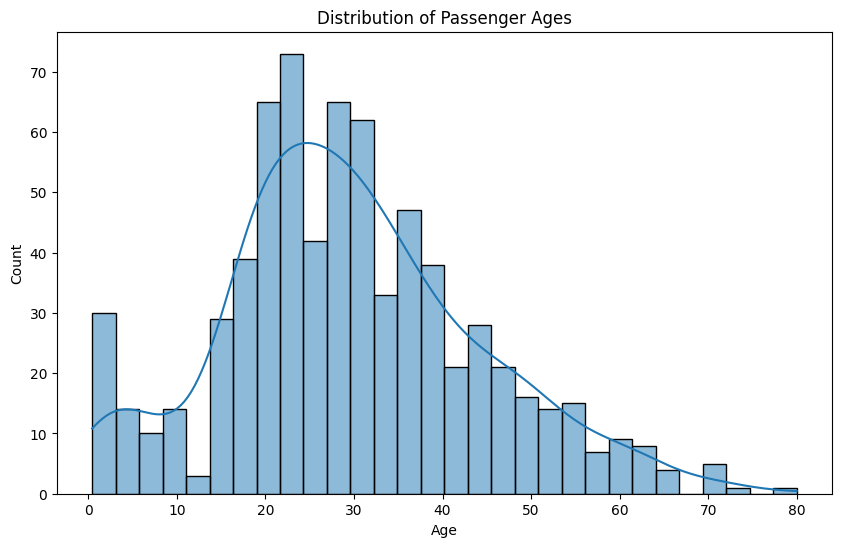

Average age of passengers by survival status:
Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64


In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Distribution of Passenger Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

average_age_survived = df.groupby('Survived')['Age'].mean()
print("Average age of passengers by survival status:")
print(average_age_survived)

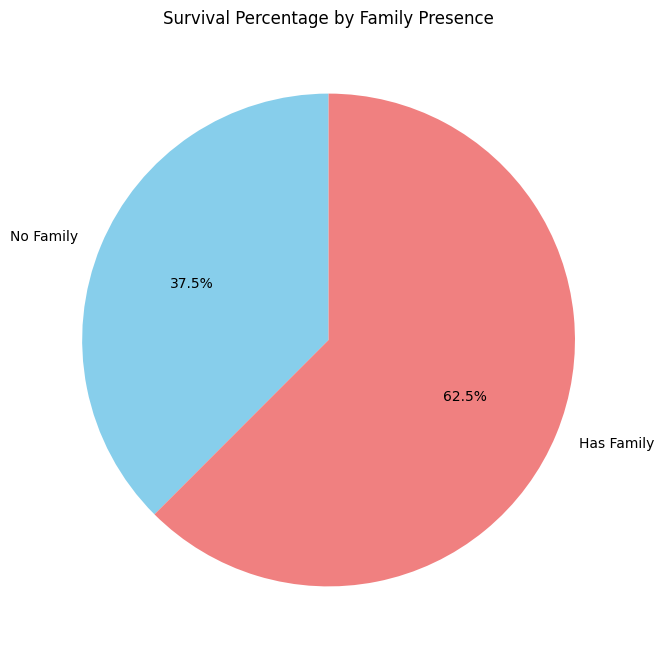

In [16]:
df['Has_Family'] = ((df['SibSp'] + df['Parch']) > 0).astype(int)
survived_family = df.groupby('Has_Family')['Survived'].value_counts(normalize=True).unstack() * 100

plt.figure(figsize=(8, 8))
plt.pie(survived_family[1], labels=['No Family', 'Has Family'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Survival Percentage by Family Presence')
plt.show()

In [17]:
average_fare = df['Fare'].mean()
high_fare_passengers = df[df['Fare'] > average_fare]
survival_rate_high_fare = high_fare_passengers['Survived'].mean() * 100

print(f"Average fare: ${average_fare:.2f}")
print(f"Survival rate for passengers who paid more than the average fare: {survival_rate_high_fare:.2f}%")

Average fare: $32.20
Survival rate for passengers who paid more than the average fare: 59.72%


In [18]:
def age_group(age):
    if age < 16:
        return 'Child'
    elif age > 60:
        return 'Senior'
    else:
        return 'Adult'

df['Age_Group'] = df['Age'].apply(age_group)

survived_age_group = df.groupby('Age_Group')['Survived'].value_counts(normalize=True).unstack() * 100
print("Survival percentage by age group:")
print(survived_age_group[1])

Survival percentage by age group:
Age_Group
Adult     36.641221
Child     59.036145
Senior    22.727273
Name: 1, dtype: float64


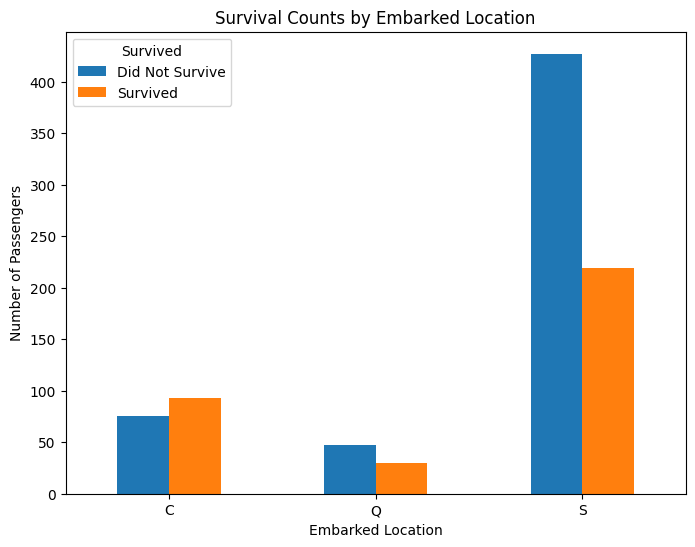

In [21]:
survived_embarked = df.groupby('Embarked')['Survived'].value_counts().unstack()

survived_embarked.plot(kind='bar', stacked=False, figsize=(8, 6))
plt.title('Survival Counts by Embarked Location')
plt.xlabel('Embarked Location')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=0)
plt.legend(title='Survived', labels=['Did Not Survive', 'Survived'])
plt.show()

In [19]:
print("Missing values before handling:")
print(df.isnull().sum())

Missing values before handling:
Survived        0
Pclass          0
Sex             0
Age           177
SibSp           0
Parch           0
Fare            0
Cabin         687
Embarked        2
Has_Family      0
Age_Group       0
dtype: int64


In [20]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df.drop('Cabin', axis=1, inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

print("\nMissing values after handling:")
print(df.isnull().sum())


Missing values after handling:
Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Has_Family    0
Age_Group     0
dtype: int64


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Has_Family', 'Age_Group']
target = 'Survived'
X = df[features]
y = df[target]
X = pd.get_dummies(X, columns=['Sex', 'Embarked', 'Age_Group'], drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Random Forest Classifier: {accuracy:.2f}")

Accuracy of the Random Forest Classifier: 0.83


In [25]:
predictions_first_10 = model.predict(X_test.head(10))

actual_first_10 = y_test.head(10)

comparison_df = pd.DataFrame({'Actual': actual_first_10, 'Predicted': predictions_first_10})

display(comparison_df)

,Actual,Predicted
709,1,0
439,0,0
840,0,0
720,1,1
39,1,0
290,1,1
300,1,1
333,0,0
208,1,1
136,1,1


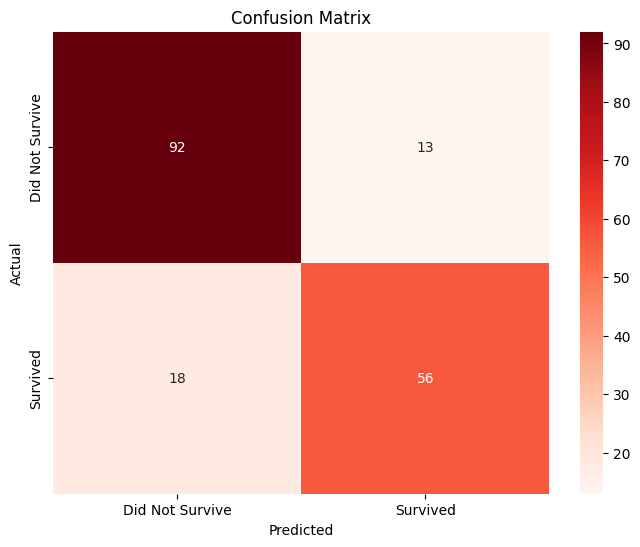

In [26]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Did Not Survive', 'Survived'], yticklabels=['Did Not Survive', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [27]:
importances = model.feature_importances_
feature_names = X_train.columns
feature_importances = pd.Series(importances, index=feature_names)

top_features = feature_importances.sort_values(ascending=False).head(3)

print("Top 3 most important features:")
print(top_features)

Top 3 most important features:
Fare        0.272379
Sex_male    0.264919
Age         0.226834
dtype: float64


In [29]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"Average cross-validation accuracy: {scores.mean():.2f}")

Average cross-validation accuracy: 0.81
